In [33]:
#import dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import scipy.stats as st
import gmaps
import gmaps.datasets
import matplotlib as mpl
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
%matplotlib inline

In [34]:
corrected_data_path = "Resources3/FullDataSet.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df

,Date,Month Abbr,State,Number of Flights,Positive,Daily Positve Increase,Deaths,Daily Death Increase,Total Tested,Daily Test Increase
0,7/16/2020,Jul,Arizona,318,134613,3259,2492,58,748491,13307
1,7/16/2020,Jul,California,1225,356178,8544,7345,118,5915508,122232
2,7/16/2020,Jul,Colorado,634,38155,469,1601,7,514742,8614
3,7/16/2020,Jul,Florida,889,315775,13965,4782,156,2815618,79665
4,7/16/2020,Jul,Georgia,1819,131275,3441,3104,13,1178222,23239
...,...,...,...,...,...,...,...,...,...,...
1795,10/23/2020,Oct,North Carolina,611,255708,2716,4114,32,3763315,35640
1796,10/23/2020,Oct,Pennsylvania,343,190579,2219,8625,33,2391447,18008
1797,10/23/2020,Oct,Texas,1402,851572,6472,17375,89,7611586,78869
1798,10/23/2020,Oct,Utah,348,101509,1960,567,4,1012740,8454


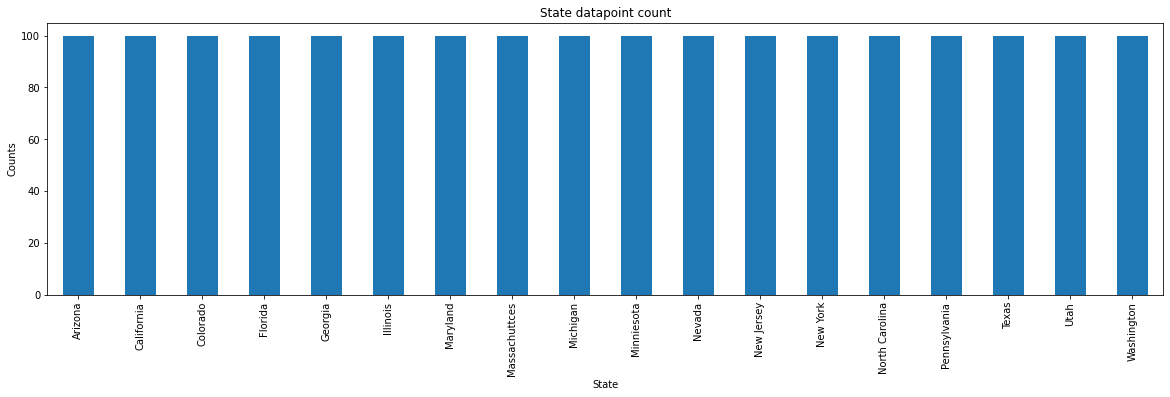

In [35]:
#total number of datapoint per state (to check the number of data points are fairly simimral )

state_gb = corrected_data_df.groupby(["State"])
count_st = state_gb.count()["Total Tested"]
count_chart= count_st.plot(kind= "bar", figsize=(20,5))
plt.title("State datapoint count")
count_chart.set_ylabel("Counts")
plt.show()

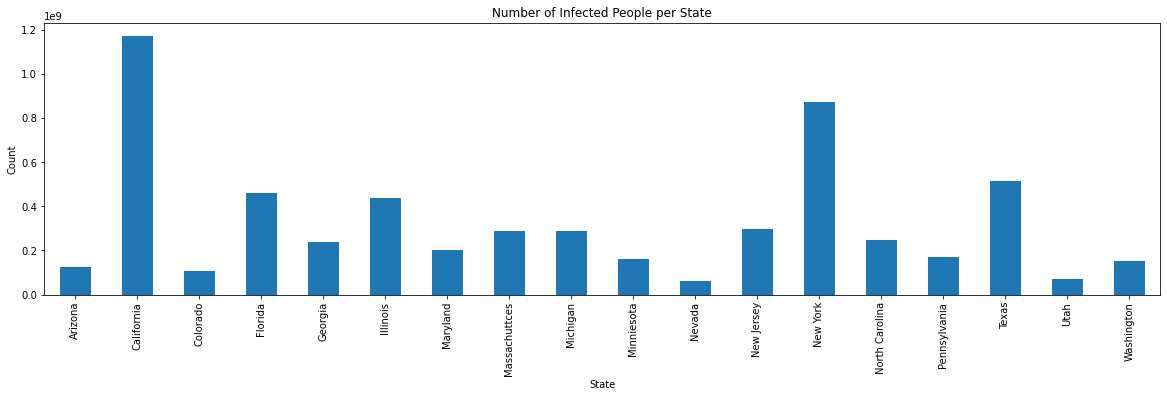

In [36]:
#total number of infected people per state in a year
state_gb = corrected_data_df.groupby(["State"])
state_count = state_gb.sum()["Total Tested"]
state_count.head(12)
count_chart = state_count.plot(kind = "bar", figsize= (20,5))
plt.title("Number of Infected People per State")
plt.ylabel('Count');
plt.show()

In [37]:
reduced_data = corrected_data_df[["State", "Month Abbr", "Total Tested"]]
reduced_data
month_list = reduced_data["Month Abbr"].unique()
month_list
state_list = reduced_data["State"].unique()
state_list
month_gb = reduced_data.groupby(["Month Abbr"])
sum_month = month_gb.sum()
sum_month.head

<bound method NDFrame.head of             Total Tested
Month Abbr              
Aug           1491120269
Jul            565478268
Oct           1862485713
Sep           1929435339>

In [38]:
#which month has the highest number of infected people
reduced_data


,State,Month Abbr,Total Tested
0,Arizona,Jul,748491
1,California,Jul,5915508
2,Colorado,Jul,514742
3,Florida,Jul,2815618
4,Georgia,Jul,1178222
...,...,...,...
1795,North Carolina,Oct,3763315
1796,Pennsylvania,Oct,2391447
1797,Texas,Oct,7611586
1798,Utah,Oct,1012740


In [39]:
ax =reduced_data.groupby(['Month Abbr','State'])['Total Tested'].sum()
ax.head(15)


Month Abbr  State         
Aug         Arizona            33527105
            California        300972587
            Colorado           26505094
            Florida           129940660
            Georgia            61843338
            Illinois          104832068
            Maryland           49492535
            Massachuttces      60218666
            Michigan           71631417
            Minniesota         39042330
            Nevada             16824892
            New Jersey         76828747
            New York          219080119
            North Carolina     61758473
            Pennsylvania       44924955
Name: Total Tested, dtype: int64

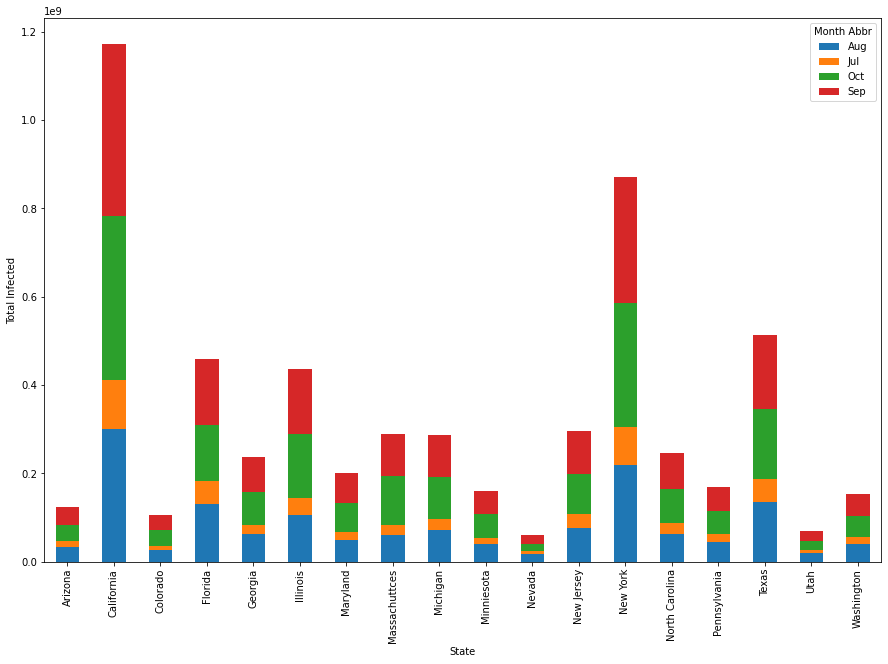

In [40]:
ax.unstack(0).plot.bar(stacked=True, figsize=(15,10))
plt.ylabel('Total Infected');
plt.show()


In [41]:
infected_groups = corrected_data_df.groupby(["State", "Month Abbr"])
sum_it_up = infected_groups.sum()
sum_it_up.head(15)

Number of Flights  Positive  Daily Positve Increase  \
State      Month Abbr                                                        
Arizona    Aug                     14163   5950198                   27825   
           Jul                      5639   2476642                   42656   
           Oct                     11363   5213451                   17375   
           Sep                     13015   6319710                   16672   
California Aug                     60342  18894736                  210497   
           Jul                     23331   6829784                  145954   
           Oct                     41442  19522756                   76240   
           Sep                     53132  22856989                  106540   
Colorado   Aug                     26805   1626720                   11019   
           Jul                     11048    674776                    8518   
           Oct                     19961   1818185                   20197   
           Sep                     22788   1883372                   12802   
Florida    Aug                     28037  17470128                  153085   
           Jul                     14161   6328937                  168576   
           Oct                     22067  16965757                   65264   

                       Deaths  Daily Death Increase  Total Tested  \
State      Month Abbr                                               
Arizona    Aug         137942                  1336      33527105   
           Jul          49524                  1261      13387730   
           Oct         132727                   215      36165104   
           Sep         161364                   623      39968537   
California Aug         345648                  3928     300972587   
           Jul         129977                  1778     109615814   
           Oct         381136                  1470     371479600   
           Sep         435369                  2859     390874484   
Colorado   Aug          54942                   152      26505094   
           Jul          26316                    97       9501709   
           Oct          46192                   118      35804275   
           Sep          56958                   109      34568618   
Florida    Aug         291835                  4365     129940660   
           Jul          91435                  2340      51793806   
           Oct         358671                  2056     128315794   

                       Daily Test Increase  
State      Month Abbr                       
Arizona    Aug                      268955  
           Jul                      198559  
           Oct                      223894  
           Sep                      254877  
California Aug                     3562264  
           Jul                     2017765  
           Oct                     2778091  
           Sep                     3331897  
Colorado   Aug                      323979  
           Jul                      172695  
           Oct                      423468  
           Sep                      338378  
Florida    Aug                      987451  
           Jul                      892135  
           Oct                      564568

what state?Texas


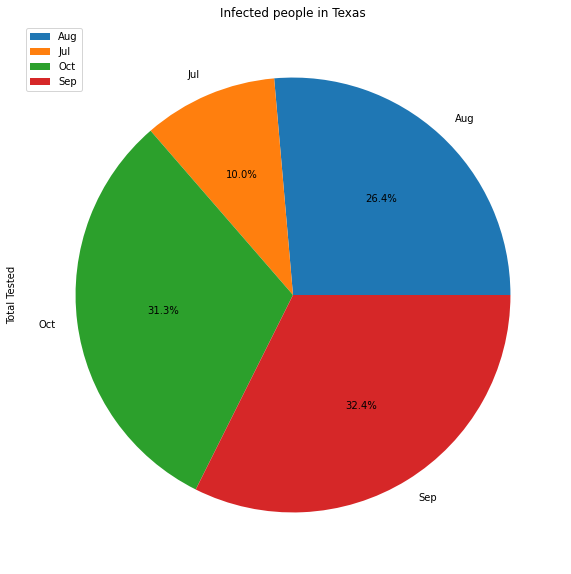

In [48]:
#just one state monthly

state_name = input("what state?")
#state_code = "CA"
just_one_state = sum_it_up.loc[state_name]
state_pie = just_one_state.plot(kind ="pie", y= "Total Tested", title= ("Infected people in " + state_name), figsize= (10,10), autopct='%1.1f%%')
state_pie.set_ylabel("Total Tested")

plt.show()
#plt.axis("equal")

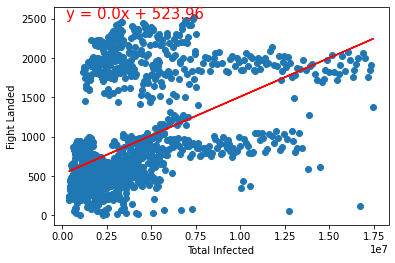

In [49]:
#Correlating the 
infected_values = corrected_data_df["Total Tested"]
flights_values = corrected_data_df["Number of Flights"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(infected_values, flights_values)
regress_values = infected_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(infected_values,flights_values)


plt.plot(infected_values,regress_values,"r-")
plt.annotate(line_eq,(200000,2500),fontsize=15,color="red")
plt.xlabel('Total Infected')
plt.ylabel('Fight Landed')
plt.show()

In [44]:
correlation = round(st.pearsonr(corrected_data_df["Total Tested"], corrected_data_df["Number of Flights"])[0],2)
print(f'correlation between the total infected people and the total flight lannded within the US is: {correlation}')

correlation between the total infected people and the total flight lannded within the US is: 0.48


In [45]:
#additional thing for some testing
reduced_data.pivot_table("Total Tested", index= "State", columns= "Month Abbr", aggfunc ="sum")


Month Abbr,Aug,Jul,Oct,Sep
State,,,,
Arizona,33527105,13387730,36165104,39968537
California,300972587,109615814,371479600,390874484
Colorado,26505094,9501709,35804275,34568618
Florida,129940660,51793806,128315794,149613628
Georgia,61843338,21874937,72931234,79647001
Illinois,104832068,38575208,146668786,145966337
Maryland,49492535,16533844,67013417,68203634
Massachuttces,60218666,23363717,110416168,95370033
Michigan,71631417,25722963,93752751,96287858
